<a href="https://colab.research.google.com/github/krimoe/handwritten-digit-recognition-/blob/main/MNIST_with_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from keras.datasets.mnist import load_data
import numpy as np
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.utils import to_categorical

In [ ]:
# load the data - it returns 2 tuples of digits & labels - one for
# the train set & the other for the test set
(train_digits, train_labels), (test_digits, test_labels) = load_data()
#  some variables...
image_height = train_digits.shape[1]  
image_width = train_digits.shape[2]
num_channels = 1  # we have grayscale images
# NOTE: image_height == image_width == 28
# re-shape the images data
train_data = np.reshape(train_digits, (train_digits.shape[0], image_height, image_width, num_channels))
test_data = np.reshape(test_digits, (test_digits.shape[0],image_height, image_width, num_channels))
# re-scale the image data to values between [0,1]
train_data = train_data.astype('float32') / 255.
test_data = test_data.astype('float32') / 255.

# one-hot encode the labels - we have 10 output classes

# so 3 -> [0 0 0 1 0 0 0 0 0 0], 5 -> [0 0 0 0 0 1 0 0 0 0] & so on
num_classes = 10
train_labels_cat = to_categorical(train_labels,num_classes)
test_labels_cat = to_categorical(test_labels,num_classes)
# split training set into training and validation
train_data2, val_data,train_labels_cat2,  val_labels = train_test_split(train_data, train_labels_cat, test_size=0.1)

In [ ]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from keras.callbacks import EarlyStopping
mycallbacks=[EarlyStopping(monitor='val_loss',patience=5)]#patience=5 il va faire plus d'epochs que patience=2
def build_model():
    model = Sequential()
    # add Convolutional layers
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='valid',))# convolution avant model
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=64, kernel_size=(3,3), activation='relu', padding='valid',))# convolution avant model
    model.add(MaxPooling2D(pool_size=(2,2)))
    model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='valid',))# convolution avant model
    model.add(MaxPooling2D(pool_size=(2,2)))
    #model.add(Conv2D(filters=32, kernel_size=(3,3), activation='relu', padding='valid',))# convolution avant model
    #model.add(MaxPooling2D(pool_size=(2,2))) # si on rajoute une autre couche le maxpooling réduite beaucoup il ne reste plus rien de l'image et donc ça créer une erreur à l'exécution
    model.add(Flatten())#ça permet d'introduire des image matrice dans le model, pas besoin de les applâtir (flatten) au préalable comme pour le checkpoint 32
    # add dense layers
    model.add(Dense(128, activation='relu')),
    model.add(Dense(activation='softmax',units=10))#quand on précise activation= et units=...l'ordre n'importe pas, mais 
    # compile with adam optimizer & categorical_crossentropy loss function
    model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
    return model
 
model = build_model()

In [ ]:
history = model.fit(train_data2, train_labels_cat2, 
                    epochs=50, batch_size=64,# on a fait epochs=50
                    validation_data=(val_data, val_labels),callbacks=mycallbacks)

Epoch 1/50
844/844 [==============================] - 4s 5ms/step - loss: 0.3141 - accuracy: 0.9026 - val_loss: 0.1072 - val_accuracy: 0.9670
Epoch 2/50
844/844 [==============================] - 4s 4ms/step - loss: 0.1033 - accuracy: 0.9683 - val_loss: 0.0855 - val_accuracy: 0.9748
Epoch 3/50
844/844 [==============================] - 4s 4ms/step - loss: 0.0757 - accuracy: 0.9768 - val_loss: 0.0700 - val_accuracy: 0.9773
Epoch 4/50
844/844 [==============================] - 4s 4ms/step - loss: 0.0604 - accuracy: 0.9812 - val_loss: 0.0670 - val_accuracy: 0.9785
Epoch 5/50
844/844 [==============================] - 4s 4ms/step - loss: 0.0508 - accuracy: 0.9844 - val_loss: 0.0663 - val_accuracy: 0.9808
Epoch 6/50
844/844 [==============================] - 4s 5ms/step - loss: 0.0417 - accuracy: 0.9876 - val_loss: 0.0517 - val_accuracy: 0.9830
Epoch 7/50
844/844 [==============================] - 5s 6ms/step - loss: 0.0367 - accuracy: 0.9886 - val_loss: 0.0652 - val_accuracy: 0.9820
Epoch 

844 c'est le nombre d'instances de training

In [ ]:
y=model.predict(test_data)
y

array([[1.0349535e-11, 9.9482314e-08, 6.2224314e-07, ..., 9.9999928e-01,
        4.2499815e-10, 1.5512130e-10],
       [4.0463136e-11, 1.4354741e-13, 1.0000000e+00, ..., 7.9871672e-13,
        6.0600288e-14, 2.0032882e-15],
       [6.3766428e-09, 9.9998522e-01, 4.5538449e-09, ..., 3.9871489e-07,
        5.2518280e-06, 8.3928811e-09],
       ...,
       [5.5608399e-20, 1.7714348e-13, 2.3318737e-15, ..., 9.8846287e-12,
        2.5964200e-12, 7.8561974e-14],
       [1.3823123e-06, 2.9957052e-12, 3.3764517e-13, ..., 6.4971834e-12,
        3.2991099e-06, 5.7745422e-07],
       [3.5574170e-09, 1.1601799e-15, 3.7351999e-06, ..., 4.0025054e-16,
        2.5854993e-08, 2.7455668e-10]], dtype=float32)

In [ ]:
test_loss, test_accuracy = model.evaluate(test_data, test_labels_cat, batch_size=64)
print('Test loss: %.4f accuracy: %.4f' % (test_loss, test_accuracy))

157/157 [==============================] - 0s 3ms/step - loss: 0.0497 - accuracy: 0.9880
Test loss: 0.0497 accuracy: 0.9880


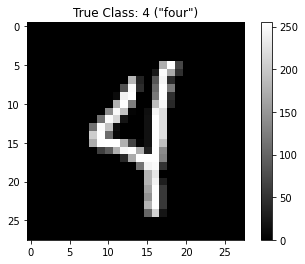

In [ ]:
text_labels = ['zero', 'one', 'two', 'three', 'four', 'five', 'six', 'seven', 'eignt', 'nine']# il faut respecter l'odre
import matplotlib.pyplot as plt

plt.figure()
random_index = np.random.randint(0, len(train_digits))
plt.imshow(train_digits[random_index], cmap='gray')
plt.colorbar()
numerical_label = train_labels[random_index]
text_description = text_labels[numerical_label]
plt.title('True Class: {} ("{}")'.format(numerical_label, text_description))

plt.gca().grid(False) # il associe chaque image à son label

In [ ]:
z=np.argmax(y,axis=1)

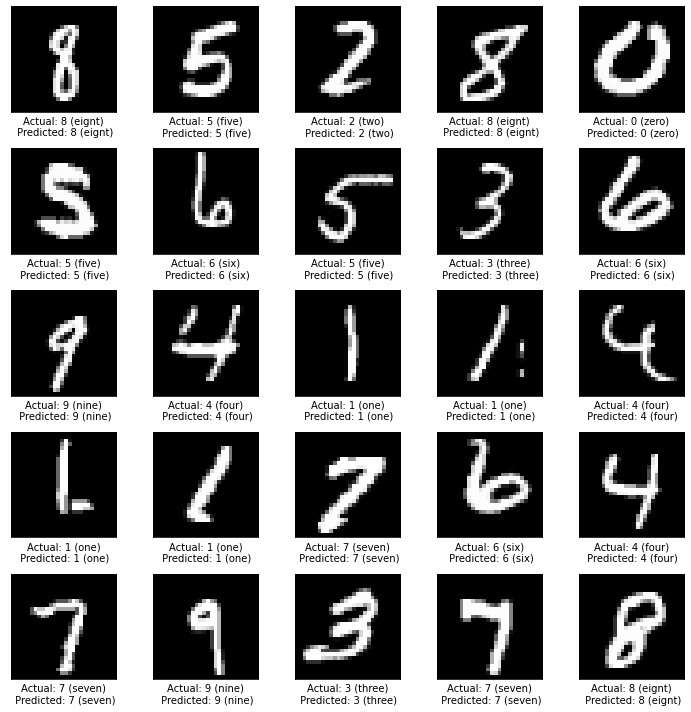

In [ ]:
from keras.backend import argmax
plt.figure(figsize=(10,10))
for i in range(25):#None
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid('off')
    
    img_index = np.random.randint(0, 10000)
    plt.imshow(test_digits[img_index], cmap=plt.cm.gray)
    
    actual_label = int(test_labels[img_index])#None
    predicted_label = int(z[img_index])#None
    
    plt.xlabel("Actual: {} ({})\n Predicted: {} ({})".format(
        actual_label, text_labels[actual_label], predicted_label, text_labels[predicted_label]
    ))
    
plt.tight_layout()
plt.show()

In [ ]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_1 (Conv2D)           (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 13, 13, 32)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 5, 5, 64)         0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 3, 3, 32)          18464     
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 1, 1, 32)        

les paramatères à définir au fitting:

4224= (32+1) * 128 # le plus 1 c'est le biais, il est implicite (invisible)

320= (3 * 3)+1 * 32 # (3 * 3) dimension du filtre, 32 = nbr de filtre, 1= biais

0 (maxpooling) , car il n'y a aucun paramètre on prends juste le max

18496=  ((((3 * 3)*32)+1)*64 #32=nbr filtre couche précédente et 64 nbr de filtre couche actuelle, le 1 pour le biais

In [ ]:
import cv2
src2 = cv2.imread('/content/testtt.jpg',cv2.IMREAD_GRAYSCALE)#cv2.IMREAD_GRAYSCALE
#src=cv2.cvtColor(src, cv2.COLOR_BGR2RGB)# pour réinverser les couleurs BGR TO RGB, # si on n'utilise pas cv2.IMREAD_GRAYSCALE
src2 =cv2.resize(src2,(28,28)) # 28*28 car c'est la dimension des images d'entraînement


<function matplotlib.pyplot.show>

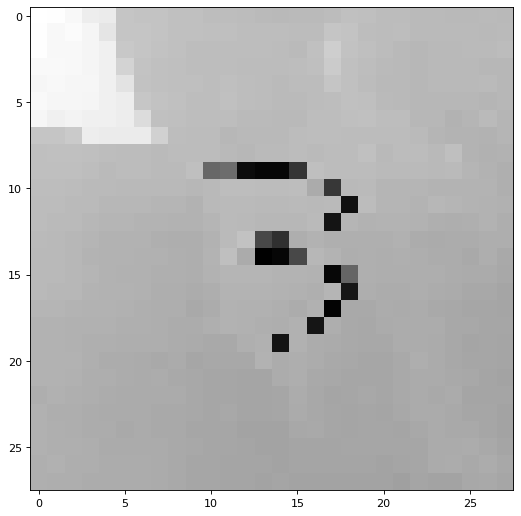

In [ ]:
plt.figure(figsize=(10, 8), dpi=80)
plt.imshow(src2,cmap='gray')
plt.show

In [ ]:
src2=src2.reshape((-1,28,28,1))#-1 pour qu'il fasse le reshape automatiquement
x2=model.predict(src2)
t2=np.argmax(x2,axis=1)
print(t2)

[8]


In [ ]:
text_labels[int(t2)]

'eignt'

In [ ]:
import cv2
src3 = cv2.imread('/content/image.jpg', cv2.IMREAD_GRAYSCALE)#cv2.IMREAD_GRAYSCALE
#src=cv2.cvtColor(src, cv2.COLOR_BGR2RGB)
src3 =cv2.resize(src3,(28,28))

<function matplotlib.pyplot.show>

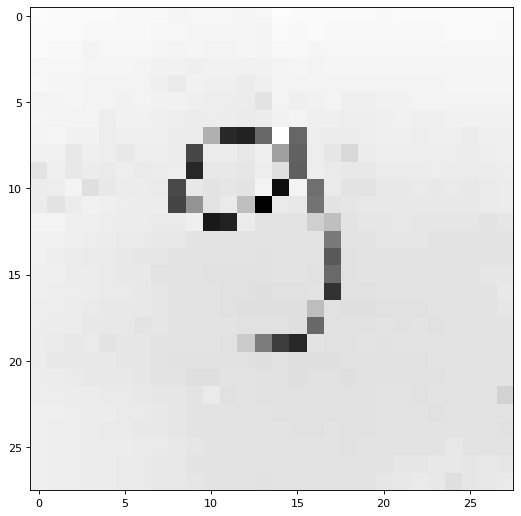

In [ ]:
plt.figure(figsize=(10, 8), dpi=80)
plt.imshow(src3,cmap='gray')
plt.show

In [ ]:
src3=src3.reshape((-1,28,28,1))#-1 pour qu'il fasse le reshape automatiquement
x3=model.predict(src3)
t3=np.argmax(x3,axis=1)
print(t3)

[0]


In [ ]:
text_labels[int(t3)]

'zero'

**Conclusion :** les images doivent être sur fond noir ressemblant le plus possible à celles du training set